In [1]:
import pandas as pd
import xgboost
from xgboost import plot_importance
import numpy as np
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
import graphviz
from matplotlib.pylab import rcParams
from sklearn.inspection import permutation_importance
from sklearn.tree import DecisionTreeRegressor
import seaborn as sns 


%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
main_path = '/content/drive/MyDrive/Project/LiveCommerse/Python_Code/Re_zero부터시작하는분석/'
excel_path = main_path + 'Total_Data_3_word제거.xlsx'

In [4]:
dff = pd.read_excel(excel_path)

In [9]:
# DataFrame 선택
df = dff[['Sub','Video_View',
       'Like_Number', 
       'Chat_User', 'Chat_Num_per_user', 'Total_Chat', 'Norm_Chat', 'Event_Chat',
       'Hello_Chat', 'Question_Chat', 'Event_Rate',
       'Hello_Rate', 'Question_Rate', 'GPT_Positive',
       'GPT_Negative', 'GPT_Neutral', 'GPT_Positive_Rate', 'GPT_Negative_Rate',
       'GPT_Neutral_Rate', 'GPT_Score_Average']]

df.describe()

,Sub,Video_View,Like_Number,Chat_User,Chat_Num_per_user,Total_Chat,Norm_Chat,Event_Chat,Hello_Chat,Question_Chat,Event_Rate,Hello_Rate,Question_Rate,GPT_Positive,GPT_Negative,GPT_Neutral,GPT_Positive_Rate,GPT_Negative_Rate,GPT_Neutral_Rate,GPT_Score_Average
count,677.000000,677.000000,677.000000,677.000000,677.000000,677.000000,677.000000,677.000000,677.000000,677.000000,677.000000,677.000000,677.000000,677.000000,677.000000,677.000000,677.000000,677.000000,677.000000,677.000000
mean,19469.264402,31454.700148,13774.700148,272.737075,5.142947,809.165436,676.323486,49.977843,34.677991,48.186115,0.046026,0.049884,0.106552,442.282127,26.045790,315.955687,0.487023,0.034965,0.448748,0.573253
std,55553.025501,50952.738930,17822.345669,418.294256,4.883832,894.935027,790.299142,106.552670,46.970433,53.030394,0.076116,0.047566,0.094508,564.667003,46.923323,334.100587,0.148109,0.031916,0.132971,0.205399
min,18.000000,0.000000,0.000000,1.000000,1.084592,10.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.200000
25%,680.000000,1691.000000,2174.000000,23.000000,2.437500,117.000000,91.000000,0.000000,3.000000,12.000000,0.000000,0.016310,0.043591,48.000000,4.000000,57.000000,0.393096,0.016012,0.358209,0.450000
50%,1920.000000,6012.000000,7338.000000,88.000000,3.675676,396.000000,321.000000,4.000000,12.000000,31.000000,0.007299,0.034268,0.076923,200.000000,12.000000,174.000000,0.495434,0.028571,0.439150,0.588303
75%,12000.000000,39693.000000,17321.000000,359.000000,6.017241,1340.000000,987.000000,41.000000,55.000000,67.000000,0.058391,0.071429,0.142857,637.000000,32.000000,511.000000,0.588235,0.044662,0.527211,0.722222
max,390000.000000,291052.000000,150396.000000,2442.000000,63.680000,4168.000000,3578.000000,687.000000,333.000000,431.000000,0.504438,0.304469,0.580645,2972.000000,612.000000,2375.000000,1.000000,0.285714,1.000000,1.181818


In [ ]:

# # DataFrame 선택
# df = dff[['Sub', 'Total_Video', 'Video_View',
#        'Like_Number', 'Total_Chat',
#        'Chat_User', 'Chat_Num_per_user', 'Event_Chat',
#        'Hello_Chat', 'Question_Chat', 'Event_Rate',
#        'Hello_Rate', 'Question_Rate', 'Dict_Negative',
#       'Dict_Positive_Rate', 'Dict_Negative_Rate',
#        'Dict_Neutral_Rate',
#        'GPT_Negative', 'GPT_Positive_Rate', 'GPT_Negative_Rate',
#        'KoBERT_Negative_Rate',
#        'Tour_only']]

In [13]:
# DataFrame 만들기. X와 y로 최종 정리되는 것으로.

# DataFrame 선택
df = dff[['Sub','Video_View',
       'Like_Number', 
       'Chat_User', 'Chat_Num_per_user', 'Total_Chat', 'Event_Chat',
       'Hello_Chat', 'Question_Chat', 'Event_Rate',
       'Hello_Rate', 'Question_Rate', 'GPT_Score_Average']]
df_scaled = pd.DataFrame(StandardScaler().fit_transform(df), columns = ['Sub','Video_View',
       'Like_Number', 
       'Chat_User', 'Chat_Num_per_user', 'Total_Chat', 'Event_Chat',
       'Hello_Chat', 'Question_Chat', 'Event_Rate',
       'Hello_Rate', 'Question_Rate', 'GPT_Score_Average'])

df_y = df_scaled['GPT_Score_Average']
df_x = df_scaled[['Sub','Video_View',
       'Like_Number', 
       'Chat_User', 'Chat_Num_per_user', 'Total_Chat', 'Event_Chat',
       'Hello_Chat', 'Question_Chat', 'Event_Rate',
       'Hello_Rate', 'Question_Rate']]


# XGBoost
X = df_x
y = df_y

In [ ]:
# 변수간 Corr 확인.
df = dff[['Sub','Video_View',
       'Like_Number', 
       'Chat_User', 'Chat_Num_per_user', 'Total_Chat', 'Event_Chat',
       'Hello_Chat', 'Question_Chat', 'Event_Rate',
       'Hello_Rate', 'Question_Rate', 'GPT_Score_Average']]
df_scaled = pd.DataFrame(StandardScaler().fit_transform(df), columns = ['Sub','Video_View',
       'Like_Number', 
       'Chat_User', 'Chat_Num_per_user', 'Total_Chat', 'Event_Chat',
       'Hello_Chat', 'Question_Chat', 'Event_Rate',
       'Hello_Rate', 'Question_Rate', 'GPT_Score_Average'])

correlation_matrix = df_scaled.corr().round(2)
plt.subplots(figsize=(20,20))
sns.heatmap(data=correlation_matrix, annot=True, cmap='YlGnBu')
plt.show()

In [37]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=50)

R_Squared : 0.759043089130011
RMSE: 0.607963
Explained Variance Score : 0.16114108076725742


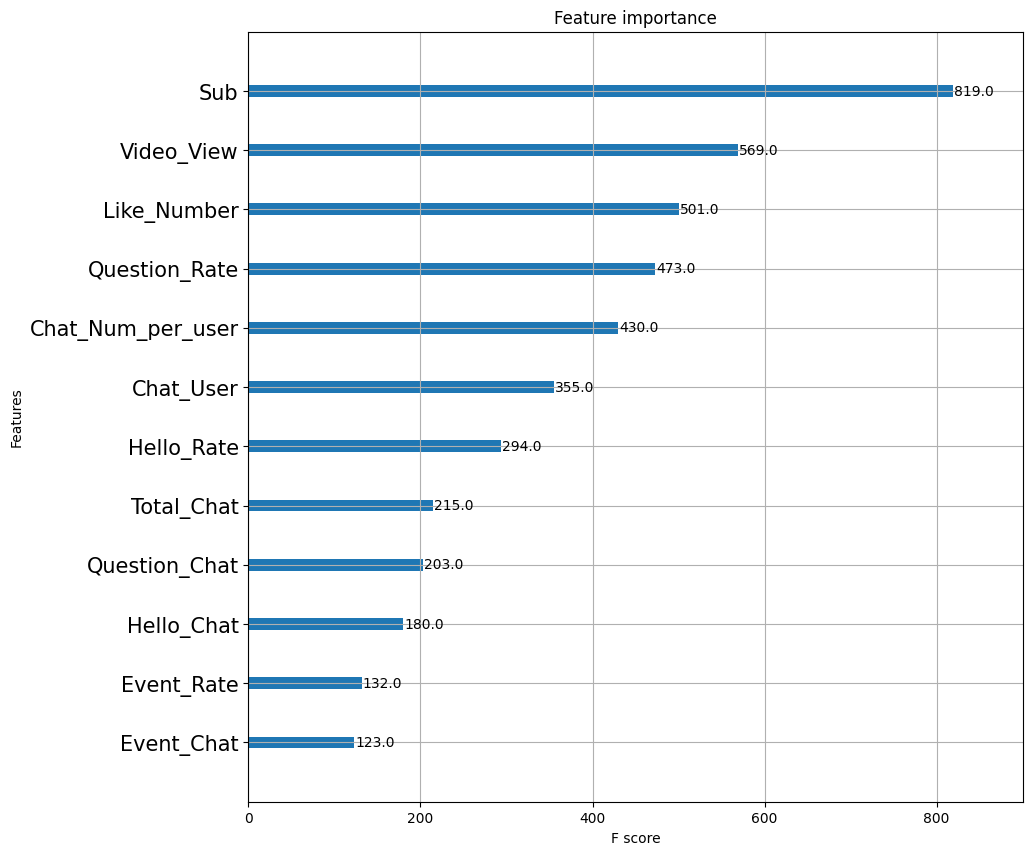

In [154]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=50)

# XGBoost
xgb_model = xgboost.XGBRegressor(n_estimators=125, learning_rate=0.025, gamma=0, subsample=0.5,
                           colsample_bytree=1, max_depth=6)
xgb_model.fit(X_train,y_train)
y_pred = xgb_model.predict(X_test)
r_sq = xgb_model.score(X_train, y_train)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R_Squared : {r_sq}")
print("RMSE: %f" % (rmse))
print(f"Explained Variance Score : {explained_variance_score(y_pred,y_test)}")


rcParams['figure.figsize'] = 10, 10
plot_importance(xgb_model)
plt.yticks(fontsize=15)
plt.show()

In [ ]:
results = permutation_importance(xgb_model, X_train, y_train, scoring='neg_mean_squared_error')
importance = results.importances_mean
feature_columns = X_train.columns

# summarize feature importance
for i,v in enumerate(importance):
    print(f'Feature: %0d, Feature_Name: {feature_columns[i]}, Score: %.5f' % (i,v))
# plot feature importance
plt.subplots(figsize=(10,10))

plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [ ]:
# Support Vector Regression

svr = SVR()
svr.fit(X_train, y_train)

y_pred = svr.predict(X_test)
r_sq = svr.score(X_train, y_train)
rmse = np.sqrt(mean_squared_error(y_test, y_pred, squared=False))

print(f"R_Squared : {r_sq}")
print("RMSE: %f" % (rmse))
print(f"Explained Variance Score : {explained_variance_score(y_pred,y_test)}")

results = permutation_importance(svr, X, y, scoring='neg_mean_squared_error')
importance = results.importances_mean
feature_columns = X_train.columns

# summarize feature importance
for i,v in enumerate(importance):
    print(f'Feature: %0d, Feature_Name: {feature_columns[i]}, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [ ]:
# 의사결정나무 - 회귀나무

dtreg = DecisionTreeRegressor(max_depth=5)
dtreg.fit(X_train, y_train)
y_pred = dtreg.predict(X_test)

r_sq = dtreg.score(X_train, y_train)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R_Squared : {r_sq}")
print("RMSE: %f" % (rmse))
print(f"Explained Variance Score : {explained_variance_score(y_pred,y_test)}")

results = permutation_importance(dtreg, X_train, y_train, scoring='neg_mean_squared_error')
importance = results.importances_mean
feature_columns = X_train.columns

# summarize feature importance
for i,v in enumerate(importance):
    print(f'Feature: %0d, Feature_Name: {feature_columns[i]}, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [48]:
from sklearn.linear_model import LinearRegression

mlr = LinearRegression()
mlr.fit(X_train, y_train)

y_pred = mlr.predict(X_test)
r_sq = mlr.score(X_train, y_train)
rmse = np.sqrt(mean_squared_error(y_test, y_pred, squared=False))

print(f"R_Squared : {r_sq}")
print("RMSE: %f" % (rmse))
print(f"Explained Variance Score : {explained_variance_score(y_pred,y_test)}")

R_Squared : 0.4000275102606927
RMSE: 0.812833
Explained Variance Score : -0.01420244347136923


In [ ]:
# ANN - MLP
models = [ 
    MLPRegressor(hidden_layer_sizes=[512, 4], alpha=0.005, random_state=42),
    MLPRegressor(hidden_layer_sizes=[48, 4], max_iter=5000, alpha=0.005, random_state=42), 
    MLPRegressor(hidden_layer_sizes=[512, 4], max_iter=5000, alpha=0.005, random_state=42), 
    MLPRegressor(hidden_layer_sizes=[1024, 4], max_iter=5000, alpha=0.005, random_state=42),
    MLPRegressor(hidden_layer_sizes=[1024, 512, 4], max_iter=5000, alpha=0.005, random_state=42),
]
for m in models:
    m.fit(X_train, y_train)
    print(m.__class__)
    print(r2_score(y_train, m.predict(X_train)))
    print(r2_score(y_test, m.predict(X_test)))
    y_pred = m.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(rmse)

# plt.figure(figsize=(12, 6))

# plt.scatter(x, y, marker='^', s=50, alpha=0.7, label='y_true')
# for i, m in enumerate(models):
#     plt.scatter(x, m.predict(x), marker='o', s=10, alpha=0.7, label='nn_{}'.format(i))
# plt.legend()
# plt.savefig('../../assets/images/markdown_img/180607_1614_nn_scatter.svg')
# plt.show()

In [ ]:
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)

y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

In [ ]:
r_sq = regr_2.score(X_train, y_train)
rmse = np.sqrt(mean_squared_error(y_test, y_2))

print(f"R_Squared : {r_sq}")
print("RMSE: %f" % (rmse))
print(f"Explained Variance Score : {explained_variance_score(y_pred,y_test)}")

R_Squared : 0.8106216902504016
RMSE: 0.154229
Explained Variance Score : -3.055959984657486


In [ ]:
X_train.head(1
             )

,Channel_Subscriber,Channel_Num_Video,Total_Chat,Non_Event,Chat_User,View_Number,M1,M2,F1,F2,M1F1,Average_Chat,Rate_Hello,Rate_Question,Rate_Chat,Rate_ChatUser
70,2090,13,2354,2335,227,106153,0,0,0,0,1,10,0,0,0,0


Feature: 0, Score: 0.00590
Feature: 1, Score: 0.00567
Feature: 2, Score: 0.00293
Feature: 3, Score: 0.00132
Feature: 4, Score: 0.02514
Feature: 5, Score: 0.00465
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00014
Feature: 10, Score: 0.00011
Feature: 11, Score: 0.03514
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000


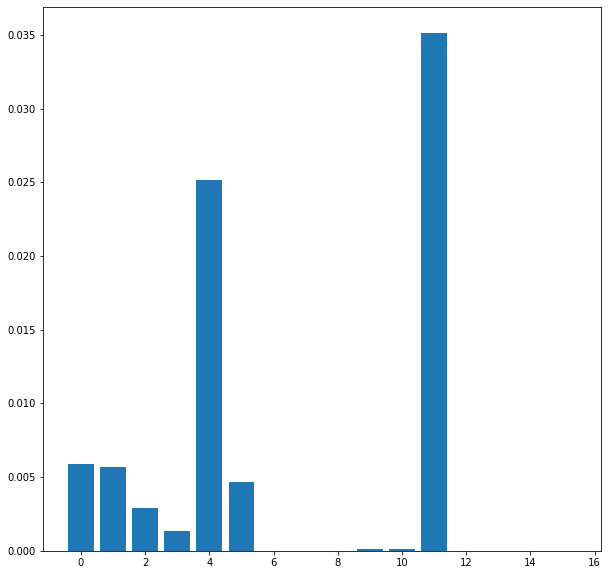

In [ ]:
results = permutation_importance(regr_2, X_train, y_train, scoring='neg_mean_squared_error')
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()